<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Machine-Learning-models-sans-Packages-/blob/main/MultiLayerNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source :https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/?ref=lbp

loading data

In [15]:
# Importing necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


normalize image data


In [16]:
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


data visualization

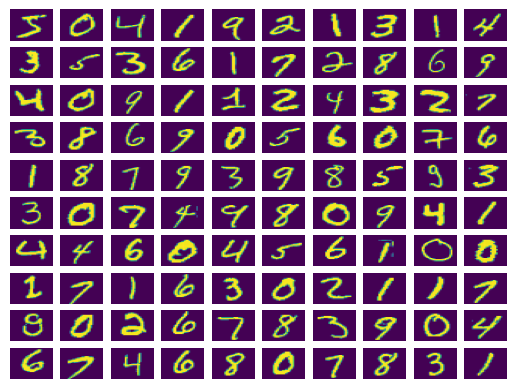

In [17]:
fg ,ax = plt.subplots(10,10)
k=0
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(x_train[k].reshape(28,28), aspect='auto')
    ax[i,j].axis('off')
    k+=1
plt.show()


model building

In [18]:
model = Sequential([
    #flatten input  28*28
    Flatten(input_shape=(28, 28)),
    #dense layer1
    Dense(256, activation='sigmoid'),
    #dense layer2
    Dense(128, activation='sigmoid'),
    #output layer
    Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


assembling model

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training model

In [20]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8107 - loss: 0.7021
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9496 - loss: 0.1686
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9667 - loss: 0.1112
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9768 - loss: 0.0775
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9841 - loss: 0.0529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9883 - loss: 0.0395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9914 - loss: 0.0286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.0215
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9954 - loss: 0.0165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9967 - loss: 0.0125


In [21]:
results=model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0977
test loss, test acc: [0.07993324846029282, 0.9771999716758728]


result visualization

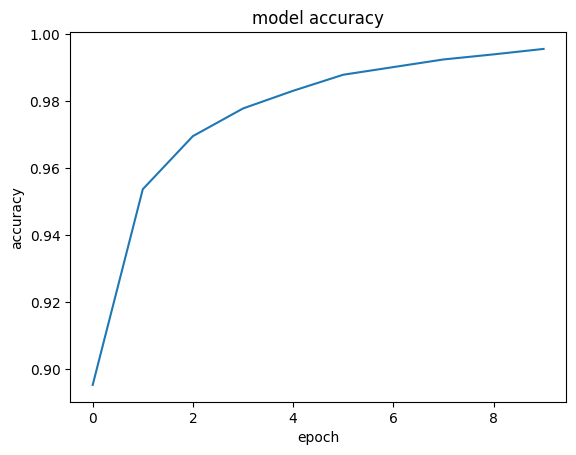

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()